In [31]:
# # examples
# class ExamplePaper(object):

#     def __init__(self, pid, content):
#         self.pid = pid
#         self.content = content
#     def add_vec_location(self, index):
#         self.vec_loc = index
# collection = []
# sentences = ['this is the first sentence for first',
#              'and the final sentence']
# counter = 5
# for line in sentences:
#     newPaper = ExamplePaper(counter, line)
#     collection.append(newPaper)
#     counter+=1

In [24]:
# # convert raw text to numerical feature vectors
# # bow(Bags of words) are used
# import numpy as np
# from sklearn.feature_extraction.text import CountVectorizer
# count_vect = CountVectorizer(min_df = 1)
# # train a dictionary to build a frquence counter
# allContent = [paper.content for paper in collection]
# print(allContent[:2])
# count_matrix = count_vect.fit_transform(allContent)
# print(len(count_vect.vocabulary_))
# print(list(count_vect.vocabulary_.keys())[:10])
# print(count_matrix[:2].toarray())
# print(count_matrix.shape)

['this is the first sentence for first', 'and the final sentence']
8
['this', 'is', 'the', 'first', 'sentence', 'for', 'and', 'final']
[[0 0 2 1 1 1 1 1]
 [1 1 0 0 0 1 1 0]]
(2, 8)


In [37]:
# # calculate tf
# from sklearn.feature_extraction.text import TfidfTransformer
# # tf = sublinear tf, 1+log(tf) if tf >0, or 0. idf = (log(1+N)/df(t,d,C)) + 1
# # df(d,t,C) means number of document d contain term t in collection C
# # Each row is normalized to have unit Euclidean norm 
# # reference to http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction
# tfidf_transformer = TfidfTransformer(use_idf=True, smooth_idf=True, sublinear_tf=True, norm=None).fit(count_matrix)
# tfidf_matrix = tfidf_transformer.transform(count_matrix)
# for i in range(0, len(collection)):
#     collection[i].add_vec_location(i)
#     print(collection[i].pid)
#     print(tfidf_matrix[i].toarray())
# print(tfidf_matrix[:2])
# print(tfidf_matrix[:2].toarray())
# print(collection[0].vec_loc)

5
[[0.         0.         2.37965929 1.40546511 1.40546511 1.
  1.         1.40546511]]
6
[[1.40546511 1.40546511 0.         0.         0.         1.
  1.         0.        ]]
  (0, 7)	1.4054651081081644
  (0, 4)	1.4054651081081644
  (0, 6)	1.0
  (0, 2)	2.3796592851687173
  (0, 5)	1.0
  (0, 3)	1.4054651081081644
  (1, 6)	1.0
  (1, 5)	1.0
  (1, 0)	1.4054651081081644
  (1, 1)	1.4054651081081644
[[0.         0.         2.37965929 1.40546511 1.40546511 1.
  1.         1.40546511]
 [1.40546511 1.40546511 0.         0.         0.         1.
  1.         0.        ]]
0


/home/gao137/intel/intelpython3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [59]:
import logging
import os

# read data from all file 
PATH = '../Data'
# print log
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# collect all data
class CanopyPaper(object):

    def __init__(self, pid, content):
        self.pid = pid
        self.content = content
    def add_vec_location(self, index):
        self.vec_index = index

from sklearn.feature_extraction.text import CountVectorizer
def read_all_file(filepath):
    counter = 0
    collection = []
    with open(filepath, 'r', encoding = 'utf8') as f:
        for line in f:
            items = line.split("\t")
            # word[0] is paper ID, word[1] is title content, word[2] is abstract content
            paperID = items[0]
            title = items[1].lower().strip()
            abstract = items[2].lower().strip()
            newPaper = CanopyPaper(paperID, title+"\n"+abstract)
            collection.append(newPaper)
            counter +=1
    f.close()
    print("Done loading files into dictionary, total ", counter, " papers")
    return collection

allpaperCollection = read_all_file(PATH+"/id_title_abstract_processed.txt")

Done loading files into dictionary, total  3149075  papers


In [60]:
print(len(allpaperCollection))
print(allpaperCollection[:2])
print(allpaperCollection[0].pid)
print(allpaperCollection[0].content)

3149075
[<__main__.CanopyPaper object at 0x7f6111eb8470>, <__main__.CanopyPaper object at 0x7f6111927860>]
3
metal substitutions incarbonic anhydrase: a halide ion probe study



In [56]:
# calculate tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
allContent = [paper.content for paper in allpaperCollection]
print(allContent[:2])
# tf = sublinear tf, 1+log(tf) if tf >0, or 0. idf = (log(1+N)/df(t,d,C)) + 1
# df(d,t,C) means number of document d contain term t in collection C
# Each row is normalized to have unit Euclidean norm 
# reference to http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction
tfidf_vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=True, sublinear_tf=True, norm=None,min_df=1).fit(allContent)
tfidf_matrix = tfidf_vectorizer.transform(allContent)
for i in range(0, len(collection)):
    collection[i].add_vec_location(i)
print(tfidf_matrix[:2].toarray())
print(tfidf_matrix.shape)

['metal substitutions incarbonic anhydrase: a halide ion probe study\n', 'purification and properties of escherichia coli dihydrofolate reductase\ndihydrofolate reductase has been purified 40-fold to apparent homogeneity from a trimethoprim-resistant strain of escherichia coli (rt 500) using a procedure that includes methotrexate affinity column chromatography. determinations of the molecular weight of the enzyme based on its amino acid composition, sedimentation velocity, and sodium dodecyl sulfate gel electrophoresis gave values of 17680, 17470 and 18300, respectively. an aggregated form of the enzyme with a low specific activity can be separated from the monomer by gel filtration; treatment of the aggregate with mercaptoethanol or dithiothreitol results in an increase in enzymic activity and a regeneration of the monomer. also, multiple molecular forms of the monomer have been detected by polyacrylamide gel electrophoresis. the unresolved enzyme exhibits two ph optima (ph 4.5 and ph

/home/gao137/intel/intelpython3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(3149075, 1397826)


In [57]:
# save the model
# Save vectorizer.vocabulary_
from sklearn.externals import joblib
newfileDir = "../models/tfidf/"
if not os.path.exists(newfileDir):
    os.makedirs(newfileDir)
joblib.dump(tfidf_vectorizer, newfileDir+'TfidfVectorizer(use_idf=True, smooth_idf=True, sublinear_tf=True, norm=None,min_df=1)'+ '.pkl') 


['../models/tfidf/TfidfVectorizer(use_idf=True, smooth_idf=True, sublinear_tf=True, norm=None,min_df=1).pkl']

In [62]:
%reset

CanopyPaper	 CountVectorizer	 PATH	 allContent	 allpaperCollection	 joblib	 loadDir	 logging	 os	 
read_all_file	 tfidf_matrix	 tfidf_vectorizer	 


In [63]:
from sklearn.externals import joblib
# Load tf idf model from disk
loadDir = "../models/tfidf/"
tfidf_vectorizer = joblib.load(loadDir+'TfidfVectorizer(use_idf=True, smooth_idf=True, sublinear_tf=True, norm=None,min_df=3)'+'.pkl')
# Load data
allContent = [paper.content for paper in allpaperCollection]
print(allContent[:2])
tfidf_matrix = tfidf_vectorizer.transform(allContent)
for i in range(0, len(allpaperCollection)):
    allpaperCollection[i].add_vec_location(i)
print(tfidf_matrix[:2].toarray())
print(tfidf_matrix.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(3149075, 419801)


In [79]:
print(allpaperCollection[-1].pid)
print(allpaperCollection[-1].vec_index)

28355772
3149074


In [84]:
# extract vector for classification
import os
import re
authorFileDir = "../Data/filteredSameNameAuthor/"
listAuthorFile = os.listdir(authorFileDir)
# loop through files in directory 
# add name to name list
name_list = []
for file in listAuthorFile:
    if not file.startswith('.'):
        if not re.match(r'\D*\d+.txt$', file):
            name_list.append(file)
print(name_list)

# for name in listAuthorFile:
#     int counter = 0;
#     for file in fileList:
#         if not file.startswith('.'):
            
# hard code to read the file one by one
# author as positive sample, other as all samples
author_pids = []
other_pids = []
with open(authorFileDir+"michael wagner0.txt", 'r', encoding = 'utf8') as f:
    for line in f:
        author_pids.extend(line.strip().split(" "))

with open(authorFileDir+"michael wagner.txt", 'r', encoding = 'utf8') as f:
    for line in f:
        other_pids.extend(line.strip().split(" "))
        
print(author_pids[0])
print(other_pids[0])

['amit patel.txt', 'robert j young.txt', 'martin wagner.txt', 'michael wagner.txt', 'david g lloyd.txt', 'carmen moreno.txt', 'jong hee chang.txt', 'hao song.txt', 'yongsheng liu.txt', 'kevin m. ryan.txt', 'yu-jun zhao.txt', 'xin li.txt', 'alfredo martinez.txt', 'wei lu.txt', 'anna ferrari.txt', 'wei wang.txt', 'jeong hwan kim.txt', 'jacob john.txt', 'fang liu.txt', 'yong wang.txt', 'cheng luo.txt', 'yang wang.txt', 'qiang wang.txt', 'francisco j blanco.txt', 'yu zhang.txt', 'yang zhao.txt', 'ana castro.txt', 'bin liu.txt', 'vivek gupta.txt', 'wei xu.txt', 'richard w morris.txt', 'chao liu.txt', 'giovanni volpe.txt', 'francisco esteves.txt', 'vineet gupta.txt', 'jin young kim.txt', 'feng liu.txt', 'vivek kumar.txt', 'sebastian wolf.txt', 'pei-ming yang.txt', 'qian wang.txt', 'feng xu.txt', 'john f marshall.txt', 'ying liu.txt', 'qin li.txt', 'jun chen.txt', 'yong liu.txt', 'jie zhang.txt', 'ying zhang.txt', 'peng zhang.txt', 'lin yang.txt', 'jun zhang.txt', 'lu\udcc3\udcads alves.txt',

In [88]:
# size of each class
print(len(author_pids))
print(len(other_pids))
print(len(allpaperCollection))

16
255
3149075
3


In [86]:
# remove author(positive sample) from other(negative sample)
import random
allPaperpids = [x for x in other_pids if x not in author_pids]
print("Negative sample size:", len(allPaperpids))
# random take sample from all the papers and treat it as class 2
# random sample will have same size with author's size
if len(author_pids)>len(allPaperpids):
    randomSample_pid = allPaperpids
else:
    randomSample_pid = random.sample(allPaperpids, len(author_pids))

Negative sample size: 239


In [103]:
# collect positive vectors from tf-idf matrix
import pandas as pd
import numpy as np
author_features = []
for pid in author_pids:
    vec_index = -1
    for paper in allpaperCollection:
        if(pid == paper.pid):
            vec_index = paper.vec_index
    if(vec_index==-1):
        print("Error, not get vector index")
    author_features.extend(tfidf_matrix[vec_index].toarray())
print(len(author_features))
print(author_features[:2])
classOne = pd.DataFrame(author_features)
classOne["label"] = 0
# classOne = np.vstack(author_features)
# label = np.ones(shape = (len(author_features),len(author_features[0])))
print(classOne.shape)

16
[array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.])]
(16, 419802)


In [104]:
# collect positive vectors from tf-idf matrix
other_features = []
for pid in randomSample_pid:
    vec_index = -1
    for paper in allpaperCollection:
        if(pid == paper.pid):
            vec_index = paper.vec_index
    if(vec_index==-1):
        print("Error, not get vector index")
    other_features.extend(tfidf_matrix[vec_index].toarray())
print(len(other_features))
print(other_features[:2])
classTwo = pd.DataFrame(other_features)
classTwo["label"] = 1
# classTwo = np.vstack(author_features)
# label = np.zeros(shape = (len(author_features),len(author_features[0])))
print(classTwo.shape)

16
[array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.])]
(16, 419802)


In [105]:
# combine data from different class get all data
combinedData = pd.concat([classOne, classTwo])
print(combinedData[:5])
combinedData = combinedData.sample(frac=1).reset_index(drop=True)
print(combinedData[:5])
# split data and label
data = combinedData.drop(['label'], axis=1)
label = combinedData['label']
print("Total sample size and shape: ",data.shape)

     0    1    2    3    4    5    6    7    8    9  ...    419792  419793  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0     0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0     0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0     0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0     0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0     0.0   

   419794  419795  419796  419797  419798  419799  419800  label  
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0      0  
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0      0  
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0      0  
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0      0  
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0      0  

[5 rows x 419802 columns]
     0    1    2    3    4    5    6    7    8    9  ...    419792  419793  \
0  0.0  0.0  0.0  0.0  0

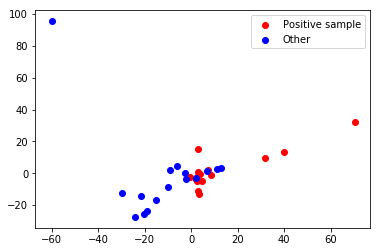

In [107]:
# Principal Component Analysis (PCA) applied to this data identifies the combination of attributes
# (principal components, or directions in the feature space) that account for the most variance in the data.
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
pca_transformed = pd.DataFrame(pca.fit_transform(X=data, y=label))
pca_transformed["label"] = label
#print(pca_transformed)
plt.scatter(pca_transformed[label==0][0], pca_transformed[label==0][1], label='Positive sample', c='red')
plt.scatter(pca_transformed[label==1][0], pca_transformed[label==1][1], label='Other', c='blue')
plt.legend()
plt.show()

             0           1  label
0   -40.602688  111.476631      0
1   -72.885834   82.149933      0
2    39.925457   26.675329      1
3   -50.426388    6.552296      1
4    79.107193   37.645496      1
5     8.045305    8.591617      1
6   -87.209785   16.472172      0
7  -112.029404   51.805367      0
8    12.384606   87.634102      0
9    92.135529  -71.341171      0
10  -71.348213  -74.766731      1
11   54.783916  -45.962330      1
12  -23.208405  -56.795506      1
13 -100.619972  -25.129234      1
14   11.782407   48.945858      0
15   48.382896   67.067795      0
16  -19.537132   29.042292      1
17   72.513626   -1.313633      1
18   51.910011  114.768402      0
19   94.076485   81.958008      1
20  -20.538282  -14.507697      0
21  127.657677   29.737686      1
22    1.712815  130.799164      1
23   10.549809  -32.112095      0
24  109.729744  -23.188158      0
25   46.514172 -110.094666      0
26  -57.743477  -32.387547      1
27  -23.006529   69.270622      0
28   38.481503

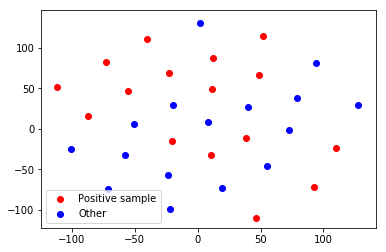

In [108]:
# TSNE
from sklearn.manifold import TSNE
from sklearn.preprocessing import Normalizer
tsne_transformed = TSNE(n_components=2, init = "pca").fit_transform(data)
tsne_transformed_normalized = Normalizer(norm='l2').fit_transform(tsne_transformed)
tsne_transformed_normalized = pd.DataFrame(tsne_transformed)
tsne_transformed_normalized["label"] = label
print(tsne_transformed_normalized)
plt.scatter(tsne_transformed_normalized[label==0][0], tsne_transformed_normalized[label==0][1], label='Positive sample', c='red')
plt.scatter(tsne_transformed_normalized[label==1][0], tsne_transformed_normalized[label==1][1], label='Other', c='blue')
plt.legend()
plt.show()

In [112]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(data, label).predict(data)
print(y_pred)
print(label)
    

[0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 1]
0     0
1     0
2     1
3     1
4     1
5     1
6     0
7     0
8     0
9     0
10    1
11    1
12    1
13    1
14    0
15    0
16    1
17    1
18    0
19    1
20    0
21    1
22    1
23    0
24    0
25    0
26    1
27    0
28    0
29    1
30    0
31    1
Name: label, dtype: int64


In [77]:
who

CanopyPaper	 CountVectorizer	 PATH	 allContent	 allPaperpids	 allpaperCollection	 authorFileDir	 author_features	 author_pids	 
f	 file	 i	 joblib	 line	 listAuthorFile	 loadDir	 logging	 name_list	 
os	 other_pids	 paper	 pd	 pid	 random	 randomSample_pid	 re	 read_all_file	 
tfidf_matrix	 tfidf_vectorizer	 vec_index	 
